<a href="https://colab.research.google.com/github/wcliao1962/2025_DL/blob/master/%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E8%A8%88%E7%AE%97(%E4%B8%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 神經網路計算(一)
參考: Deep Learning, 齋藤康毅，OREILLY

## Activation functions
### Sigmoid函數

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x=1

In [ ]:
y=sigmoid(x)
print(y)

0.7310585786300049


In [ ]:
x=np.array([-1.0, 1.0, 2.0])

In [ ]:
y=sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


In [ ]:
import matplotlib.pylab as plt

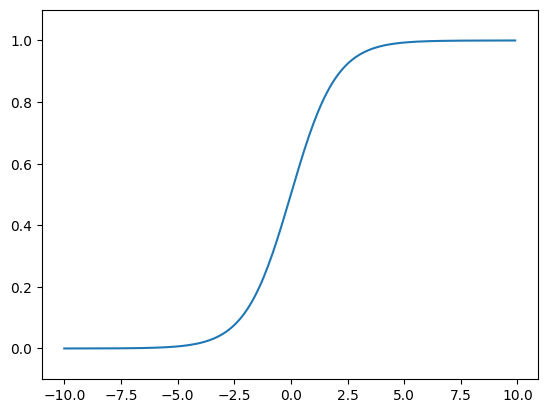

In [ ]:
X = np.arange(-10.0, 10.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU函數

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
x=1

In [ ]:
y=relu(x)
print(y)

1


In [ ]:
x=np.array([-1.0, 1.0, 2.0])

In [ ]:
y=relu(x)
print(y)

[0. 1. 2.]


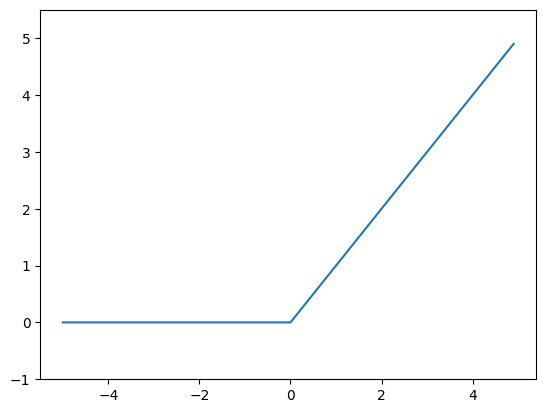

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### Softmax函數
* https://zh.wikipedia.org/wiki/Softmax函數
* https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

In [ ]:
def softmax(x):
    c=np.max(x)
    x = x - c
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
x=np.array([1000, 1001,999,1002])

In [ ]:
np.max(x)

1002

In [ ]:
x-np.max(x)

array([-2, -1, -3,  0])

In [ ]:
x=x-np.max(x)
np.exp(x)

array([0.13533528, 0.36787944, 0.04978707, 1.        ])

In [ ]:
np.sum(np.exp(x))

1.553001792775919

In [ ]:
y=softmax(x)
print(y)

[0.08714432 0.23688282 0.0320586  0.64391426]


In [ ]:
np.sum(y)

1.0

## 單層神經網路的計算
* 單層神經網路就是除了輸入層神經元外，還有一層神經元，這一層也就是輸出層
* 輸入層神經元的個數，依輸入資料的屬性(或特徵值)個數決定
* 若是分類問題，輸出層神經元的個數，由資料的類別個數決定；若是迴歸問題，輸出層神經元只會有一個。

#### 輸入層：兩個神經元 (x1, x2)

In [ ]:
X=np.array([1, 2])
X.shape

(2,)

#### 輸出層：三個神經元 (y1, y2, y3)

In [ ]:
W=np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [ ]:
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
b=np.array([4, 8, 2])

In [ ]:
z=np.dot(X, W)+b
print(z)

[ 9 19 19]


### 測試使用不同激活函數

In [ ]:
y=sigmoid(z)
print(y)

[0.99987661 0.99999999 0.99999999]


In [ ]:
y=relu(z)
print(y)

[ 9 19 19]


In [ ]:
y=softmax(z)
print(y)

[2.26994496e-05 4.99988650e-01 4.99988650e-01]


## 三層神經網路的計算
* 三層神經網路就是除了輸入層神經元外，另有兩個隱藏層神經元，及最後的輸出層
* 輸入層神經元的個數，依輸入資料的屬性(或特徵值)個數決定
* 若是分類問題，輸出層神經元的個數，由資料的類別個數決定；若是迴歸問題，輸出層神經元只會有一個。

#### 輸入層

In [ ]:
X=np.array([1.0, 0.5])

#### 第一層：三個神經元

In [ ]:
W1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1=np.array([0.1, 0.2, 0.3])

In [ ]:
print(X.shape)
print(W1.shape)
print(b1.shape)

(2,)
(2, 3)
(3,)


In [ ]:
z1=np.dot(X, W1)+b1
print(z1)

[0.3 0.7 1.1]


In [ ]:
h1=sigmoid(z1)
print(h1)

[0.57444252 0.66818777 0.75026011]


#### 第二層：兩個神經元

In [ ]:
W2=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2=np.array([0.1, 0.2])

In [ ]:
print(h1.shape)
print(W2.shape)
print(b2.shape)

(3,)
(3, 2)
(2,)


In [ ]:
z2=np.dot(h1, W2)+b2
print(z2)

[0.51615984 1.21402696]


In [ ]:
h2=relu(z2)
print(h2)

[0.51615984 1.21402696]


#### 第三層(輸出層)：兩個神經元

In [ ]:
W3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])

In [ ]:
print(h2.shape)
print(W3.shape)
print(b3.shape)

(2,)
(2, 2)
(2,)


In [ ]:
z3=np.dot(h2, W3)+b3
print(z3)

[0.39442138 0.84045873]


In [ ]:
y=softmax(z3)
print(y)

[0.39030333 0.60969667]


## Loss fnctions
### Cross entropy error (交叉熵誤差)

In [ ]:
def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y + 1e-7))

In [ ]:
t=[1, 0]

In [ ]:
np.log(y + 1e-7)

array([-0.94083081, -0.49479355])

In [ ]:
t*np.log(y + 1e-7)

array([-0.94083081, -0.        ])

In [ ]:
-np.sum(t * np.log(y + 1e-7))

0.9408308128473432

In [ ]:
cross_entropy_error(y, t)

0.9408308128473432